# Question 1. Non-deep learning methods

### Load libraries

In [1]:
# ----- LOADING LIBRARIES -----
import numpy as np
from numpy import mean, std
import pandas as pd

from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error as MSE

from sklearn import svm
from sklearn.svm import SVC # for Support Vector Classification model
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
from utils import plot_hist

import matplotlib.pyplot as plt
import seaborn as sns

# Tensorflow
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import tensorflow_datasets as tfds

c:\Users\andly\.conda\envs\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Num GPUs Available:  1


### Provided function for converting samples

In [5]:
# ----- FUNCTION FOR CONVERTING IMAGES -----
def convert_sample(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image,[32,32]).numpy()
    image = image.reshape(1,-1)
    return image
    24

### Setting data directory

In [6]:
# ----- Data directory -----
data_dir = r'C:\Users\andly'
print('Current data dir '+data_dir)

Current data dir C:\Users\andly


### Load the dataset

In [7]:
# ----- LOADING DATASET -----
tf.random.set_seed(88)
ds1,ds2,ds3 = tfds.load('patch_camelyon',
                    split=['train[:5%]','test[:5%]','validation[:5%]'],
                    data_dir = data_dir,
                    download=False,
                    batch_size=-1, # All data...no batches needed 
                    as_supervised=True, # So that we easily can transform data to numpy format
                    shuffle_files=True)
print('Done Loading Data')

Done Loading Data


### Split the data into train, test and validation. Scale the data and create labels.

In [8]:
# ----- DATA SPLITTING ------
train_dataset = tfds.as_numpy(ds1) # FULL DATA
train_dataset_image = np.vstack(list(map(convert_sample,train_dataset[0]))) # <-- This is the X
train_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(train_dataset_image)
train_dataset_label = train_dataset[1].reshape(-1,) # <-- This is y   
print(f'Shape of training data features (observations,features): {train_dataset_image_Scaled.shape}')
print(f'Shape of training data labels (observations,): {train_dataset_label.shape}')

validation_dataset = tfds.as_numpy(ds3)
validation_dataset_image = np.vstack(list(map(convert_sample,validation_dataset[0])))
validation_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(validation_dataset_image)
validation_dataset_label = validation_dataset[1].reshape(-1,) 

test_dataset = tfds.as_numpy(ds2)
test_dataset_image = np.vstack(list(map(convert_sample,test_dataset[0]))) # <-- X_test
test_dataset_image_Scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(test_dataset_image)
test_dataset_label = test_dataset[1].reshape(-1,)
print("Done spliting data")

c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Shape of training data features (observations,features): (13107, 1024)
Shape of training data labels (observations,): (13107,)


c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Done spliting data


c:\Users\andly\.conda\envs\venv\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


## SVM

#### Seeing how the distribution is between the two classes

In [ ]:
# How many labels are there
unique_train, counts_train = np.unique(train_dataset_label, return_counts = True)
print(np.asarray((unique_train, counts_train)).T)

# How many labels are there
unique_test, counts_test = np.unique(validation_dataset_label, return_counts = True)
print(np.asarray((unique_test, counts_test)).T)

[[   0 6563]
 [   1 6544]]
[[  0 814]
 [  1 824]]


#### Initiating SVM classifier, with RBF kernel, and predicting

In [ ]:
from sklearn import svm
from sklearn.svm import SVC # for Support Vector Classification model
svm = svm.SVC(kernel='rbf')
svm.fit(train_dataset_image_Scaled, train_dataset_label)



#### Confusion matrix for validation dataset

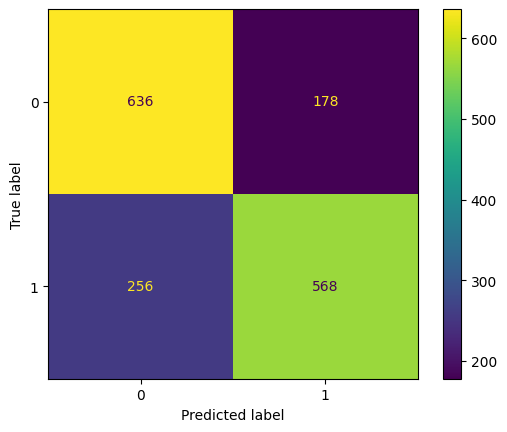

73.5

In [ ]:
val_pred_svm = svm.predict(validation_dataset_image_Scaled)
cm_svm = confusion_matrix(validation_dataset_label, val_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
ac_score_svm = accuracy_score(validation_dataset_label, val_pred_svm)
disp_svm.plot()
plt.show()
round(ac_score_svm * 100, 2)




#### Confusion matrix for test dataset

In [ ]:
test_pred_svm = svm.predict(test_dataset_image_Scaled)
cm_svm = confusion_matrix(test_dataset_label, test_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
ac_score_svm = accuracy_score(test_dataset_label, test_pred_svm)
disp_svm.plot()
plt.show()
round(ac_score_svm * 100, 2)

### Finding an optimization for SVM through random gridsearch

In [ ]:
svm = svm.SVC()
svm_params = {'C':[.1, .4, 1], 'kernel':['rbf']}
svm_optimization = GridSearchCV(svm, svm_params, cv=5, verbose=4)

#### Fitting the SVM grid search

In [ ]:
svm_optimization.fit(train_dataset_image_Scaled, train_dataset_label)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.762 total time= 1.9min
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.765 total time= 1.6min
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.773 total time= 1.5min
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.758 total time= 1.4min
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.752 total time= 1.4min
[CV 1/5] END .................C=0.4, kernel=rbf;, score=0.768 total time= 1.4min
[CV 2/5] END .................C=0.4, kernel=rbf;, score=0.764 total time= 1.4min
[CV 3/5] END .................C=0.4, kernel=rbf;, score=0.775 total time= 1.9min
[CV 4/5] END .................C=0.4, kernel=rbf;, score=0.763 total time= 1.8min
[CV 5/5] END .................C=0.4, kernel=rbf;, score=0.763 total time= 1.9min
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.772 total time= 1.8min
[CV 2/5] END ...................C=1, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 1], 'kernel': ['rbf']}, verbose=4)

#### Printing best svm parameters

In [ ]:
print(svm_optimization.best_params_)

{'C': 0.4, 'kernel': 'rbf'}


#### Fitting the SVM with optimal hyper parameters

In [ ]:
from sklearn import svm
from sklearn.svm import SVC # for Support Vector Classification model
best_svm = svm.SVC(kernel='rbf', C = 0.4)
best_svm.fit(train_dataset_image_Scaled, train_dataset_label)


#### Confusion Matrix for validation dataset

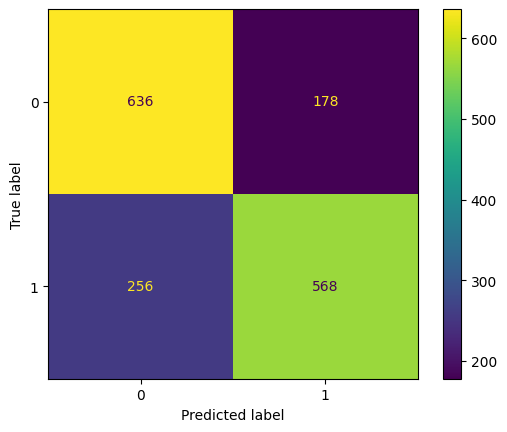

73.93

In [ ]:
y_pred_best_svm = best_svm.predict(validation_dataset_image_Scaled)
cm_best_svm = confusion_matrix(validation_dataset_label, y_pred_best_svm)
disp_best_svm = ConfusionMatrixDisplay(cm_svm)
ac_score_best_svm = accuracy_score(validation_dataset_label, y_pred_best_svm)
disp_best_svm.plot()
plt.show()
round(ac_score_best_svm * 100, 2)




#### Confusion Matrix for test dataset

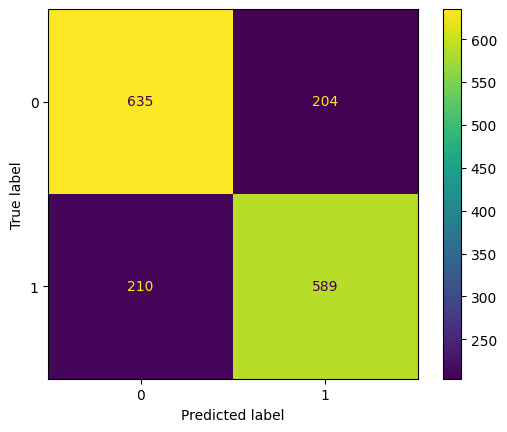

73.93

In [ ]:
y_pred_best_svm_testing = best_svm.predict(test_dataset_image_Scaled)

cm_best_svm_test = confusion_matrix(test_dataset_label, y_pred_best_svm_testing)
disp_best_svm_test = ConfusionMatrixDisplay(cm_best_svm_test)
ac_score_best_svm_test = accuracy_score(test_dataset_label, y_pred_best_svm_testing)
disp_best_svm_test.plot()
plt.show()
round(ac_score_best_svm * 100, 2)




## Random forest method (Base model) with accuracies

In [26]:

# ----- RANDOM FOREST BASE MODEL -----

# ----- Create random forest model -----
rf = RandomForestClassifier()

# ----- Fit the random forest model -----
rf.fit(train_dataset_image_Scaled, train_dataset_label)

# Make predictions on the training set
y_train_pred = rf.predict(train_dataset_image_Scaled)

# # Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# # Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# # Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# # Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)

# # Make predictions on the validation set
y_val_pred = rf.predict(validation_dataset_image_Scaled)

# # Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# # Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# # Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# # Compute the F1-score on the test set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Val F1-score:", val_f1)

# # Make predictions on the test set
y_test_pred = rf.predict(test_dataset_image_Scaled)

# # Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# # Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# # Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-score: 1.0
Validation Accuracy: 0.7478632478632479
Validation Precision: 0.7874125874125875
Validation Recall: 0.683252427184466
Val F1-score: 0.7316439246263808
Test Accuracy: 0.7338217338217338
Test Precision: 0.7574468085106383
Test Recall: 0.6683354192740926


#### Confusion matrix for the random forest base model

In [ ]:

# ----- CONFUSION MATRIX: RANDOM FOREST BASE MODEL -----
cm_base_rf = confusion_matrix(validation_dataset_label, y_val_pred)
disp_base_rf = ConfusionMatrixDisplay(cm_base_rf)
ac_score_base_rf = accuracy_score(validation_dataset_label, y_val_pred)
disp_base_rf.plot()
plt.show()
round(ac_score_base_rf * 100, 2)

## Random forest method (Grid search)

In [ ]:
# ----- RANDOM FOREST GRID SEARCH -----

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [200, 300, 800],
    'max_depth': [1, 2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

# Initialize the GridSearchCV
grid_search2 = GridSearchCV(rf, param_grid, cv=3, verbose=4)

#Fit the GridSearchCV to the training data
grid_search2.fit(train_dataset_image_Scaled, train_dataset_label)

#Print the best parameters
print("Best parameters:", grid_search2.best_params_)




Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.618 total time=   3.3s
[CV 2/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.638 total time=   3.2s
[CV 3/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.615 total time=   3.5s
[CV 1/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.622 total time=   5.4s
[CV 2/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.641 total time=   5.6s
[CV 3/3] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.618 total time=   5.4s
[CV 1/3] END max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.621 total time=   3.8s
[CV 2/3] END max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.640 total time=   3.3s
[CV

#### Random forest method and accuracies (Tuned w. Grid search hyper parameters)

In [10]:
# ----- RANDOM FOREST WITH NEW HYPER PARAMETERS -----
rf_hyper = RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
rf_hyper.fit(train_dataset_image_Scaled, train_dataset_label)
# Make predictions on the training set
y_train_pred = rf_hyper.predict(train_dataset_image_Scaled)

# # Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# # Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# # Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# # Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)

# # Make predictions on the validation set
y_val_pred = rf_hyper.predict(validation_dataset_image_Scaled)

# # Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# # Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# # Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# # Compute the F1-score on the test set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Val F1-score:", val_f1)

# # Make predictions on the test set
y_test_pred = rf_hyper.predict(test_dataset_image_Scaled)

# # Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# # Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# # Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

Training Accuracy: 0.6832227054245823
Training Precision: 0.6293812202509736
Training Recall: 0.8890586797066015
Training F1-score: 0.7370154547757791
Validation Accuracy: 0.6959706959706959
Validation Precision: 0.638135593220339
Validation Recall: 0.9138349514563107
Val F1-score: 0.7514970059880239
Test Accuracy: 0.681929181929182
Test Precision: 0.6172006745362564
Test Recall: 0.9161451814768461


#### Confusion matrix for the tuned random forest

In [ ]:
# ----- CONFUSION MATRIX TUNED RANDOM FOREST -----
cm_best_rf = confusion_matrix(validation_dataset_label, y_val_pred)
disp_best_rf = ConfusionMatrixDisplay(cm_best_rf)
ac_score_best_rf = accuracy_score(validation_dataset_label, y_val_pred)
disp_best_rf.plot()
plt.show()
round(ac_score_best_rf * 100, 2)

## LightGBM boosting method

#### Initialize and fit the LightGBM model

In [37]:
lgbm = LGBMClassifier()
lgbm.fit(train_dataset_image_Scaled, train_dataset_label)


#### LightGBM Prediction on validation data and confusion matrix

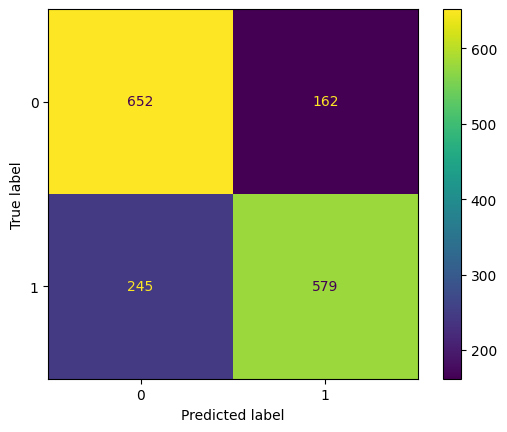

75.15

In [38]:
y_pred_lgbm = lgbm.predict(validation_dataset_image_Scaled)
cm_lgbm = confusion_matrix(validation_dataset_label, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(cm_lgbm)
ac_score_lgbm = accuracy_score(validation_dataset_label, y_pred_lgbm)
disp_lgbm.plot()
plt.show()
round(ac_score_lgbm * 100, 2)




### Finding an optimization for LightGBM through randomized search

In [ ]:
lgbm_params = {'n_estimators':[600, 800, 1000],'boosting_type':['dart', 'gbdt'],'num_leaves':[30, 35, 40], 'max_depth':[40, 45, 50],
             'learning_rate':[.1, .12, .14], 'min_child_samples':[5, 10, 15]}
lgbm_optimization = RandomizedSearchCV(lgbm, lgbm_params)

#### Fitting the randomized search for LightGBM

In [ ]:
lgbm_optimization.fit(train_dataset_image_Scaled, train_dataset_label)
print(lgbm_optimization.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 734, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 538, in fit
    self._Booster = train(params, train_set,
  File "/usr/local/lib/python

{'num_leaves': 40, 'n_estimators': 800, 'min_child_samples': 15, 'max_depth': 40, 'learning_rate': 0.12, 'boosting_type': 'dart'}


#### Initializing and fitting LightGBM model with suggested hyper parameters 

In [50]:
best_lgbm = LGBMClassifier(num_leaves=40, n_estimators=800, min_child_samples=15, max_depth=40, learning_rate=.12, boosting_type='dart')
best_lgbm.fit(train_dataset_image_Scaled, train_dataset_label)


#### Predicting with the tuned LightGBM and creating confusion matrix for the validation data

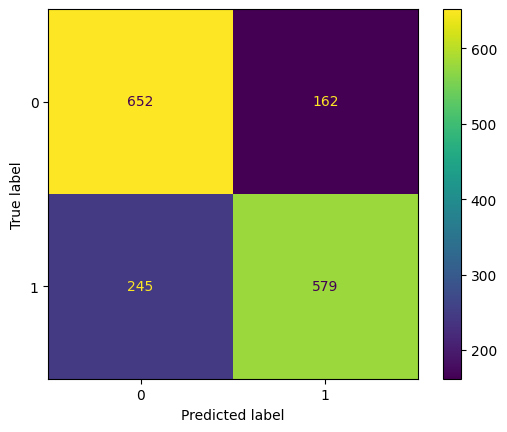

75.4

In [51]:
y_pred_best_lgbm = best_lgbm.predict(validation_dataset_image_Scaled)

cm_best_lgbm = confusion_matrix(validation_dataset_label, y_pred_best_lgbm)
disp_best_lgbm = ConfusionMatrixDisplay(cm_lgbm)
ac_score_best_lgbm = accuracy_score(validation_dataset_label, y_pred_best_lgbm)
disp_best_lgbm.plot()
plt.show()
round(ac_score_best_lgbm * 100, 2)




#### Predicting with the tuned LightGBM and creating confusion matrix for the test data

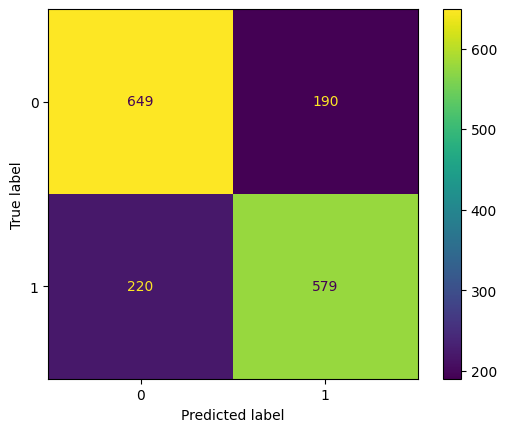

75.4

In [52]:
y_pred_best_lgbm_testing = best_lgbm.predict(test_dataset_image_Scaled)

cm_best_lgbm_test = confusion_matrix(test_dataset_label, y_pred_best_lgbm_testing)
disp_best_lgbm_test = ConfusionMatrixDisplay(cm_best_lgbm_test)
ac_score_best_lgbm_test = accuracy_score(test_dataset_label, y_pred_best_lgbm_testing)
disp_best_lgbm_test.plot()
plt.show()
round(ac_score_best_lgbm * 100, 2)

## Ensemble Learning

In [ ]:
# Ensemble Learning with non-deep learning

import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss


# Initialize the classifiers
svm = svm.SVC(C=0.4, kernel='rbf')
rf = RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
lgbm = LGBMClassifier(num_leaves=40, n_estimators=800, min_child_samples=15, max_depth=40, learning_rate=.12, boosting_type='dart')


#### Initializing and fitting the Ensemble learning method

In [ ]:
# Create the ensemble model
ensemble = StackingClassifier(estimators=[('svm', svm), ('rf', rf), ('lgbm',lgbm)], final_estimator=LogisticRegression())

# Fit the ensemble model to the training data
ensemble.fit(train_dataset_image_Scaled, train_dataset_label)

#### Ensemble learning prediction on test data

In [ ]:

# Predict on the test data
y_pred = ensemble.predict(test_dataset_image_Scaled)

ensemble_matrix = confusion_matrix(validation_dataset_label, y_pred)
disp_best_ensemble_matrix = ConfusionMatrixDisplay(ensemble_matrix)
ac_score_best_ensemble_matrix = accuracy_score(validation_dataset_label, y_pred)
disp_best_ensemble_matrix.plot()
plt.show()
round(ac_score_best_ensemble_matrix * 100, 2)


#### Ensemble learning prediction on training and validation data  

In [ ]:
# Make predictions on the training data
y_train_pred = ensemble.predict(train_dataset_image_Scaled)
# Compute the accuracy on the training set
train_accuracy = accuracy_score(train_dataset_label, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Compute the precision on the training set
train_precision = precision_score(train_dataset_label, y_train_pred)
print("Training Precision:", train_precision)

# Compute the recall on the training set
train_recall = recall_score(train_dataset_label, y_train_pred)
print("Training Recall:", train_recall)

# Compute the F1-score on the training set
train_f1 = f1_score(train_dataset_label, y_train_pred)
print("Training F1-score:", train_f1)


# Make predictions on the validation set
y_val_pred = ensemble.predict(validation_dataset_image_Scaled)

# Compute the accuracy on the validation set
val_accuracy = accuracy_score(validation_dataset_label, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute the precision on the validation set
val_precision = precision_score(validation_dataset_label, y_val_pred)
print("Validation Precision:", val_precision)

# Compute the recall on the validation set
val_recall = recall_score(validation_dataset_label, y_val_pred)
print("Validation Recall:", val_recall)

# Compute the F1-score on the validation set
val_f1 = f1_score(validation_dataset_label, y_val_pred)
print("Validation F1-score:", val_f1)

# Make predictions on the test set
y_test_pred = ensemble.predict(test_dataset_image_Scaled)

# Compute the accuracy on the test set
test_accuracy = accuracy_score(test_dataset_label, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute the precision on the test set
test_precision = precision_score(test_dataset_label, y_test_pred)
print("Test Precision:", test_precision)

# Compute the recall on the test set
test_recall = recall_score(test_dataset_label, y_test_pred)
print("Test Recall:", test_recall)

# Compute the F1-score on the test set
test_f1 = f1_score(test_dataset_label, y_test_pred)
print("Test F1-score:", test_f1)

Training Accuracy: 0.9841306172274357
Training Precision: 0.9771084337349397
Training Recall: 0.991442542787286
Training F1-score: 0.9842233009708738
Validation Accuracy: 0.757020757020757
Validation Precision: 0.7870619946091644
Validation Recall: 0.7087378640776699
Validation F1-score: 0.7458492975734354
Test Accuracy: 0.7484737484737485
Test Precision: 0.7562913907284768
Test Recall: 0.7146433041301627
Test F1-score: 0.7348777348777348
